In [4]:
import math
import random
from enum import Enum

import networkx as nx

from mesa import Agent, Model
from mesa.time import StagedActivation
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from mesa.space import NetworkGrid

from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer
from pyvis.network import Network

import math

from mesa.visualization.ModularVisualization import ModularServer
from mesa.visualization.UserParam import UserSettableParameter
from mesa.visualization.modules import ChartModule
from mesa.visualization.modules import NetworkModule
from mesa.visualization.modules import TextElement

import pandas as pd 
import numpy as np
import scipy.sparse as sps
import scipy as sp

import matplotlib.pyplot as plt

import multinetx as mx


In [5]:
# Function to create list of connected networks ('N>30')
def create_networks(networks, N=30):
    
    # Return list with created networks
    network_list = []
    
    # Create IDs for agents
    shuffled = random.sample(range(0, N), N)

    # Set roles
    kingpin_main = shuffled[0]
    kingpin_list = shuffled[1:4]
    orphan_list = shuffled[4:8]
    broker_list = shuffled[8:16]
    dealer_list = shuffled[16:23]
    coordinator_list = shuffled[23:N]
    
    family_list = random.sample(range(0, N), 5)
    friend_list = random.sample(range(0, N), 5)
    casual_list = random.sample(range(0, N), 5)
    
    print("orphan_list: ", orphan_list)
    
    # Create each network
    for name in networks:
        
        # Start with empty network
        G = nx.empty_graph(N)
        
        color_dict = {kingpin_main: 'red'} | dict.fromkeys(kingpin_list, 'yellow') | \
        dict.fromkeys(orphan_list, 'orange') | dict.fromkeys(broker_list, 'blue') | \
        dict.fromkeys(dealer_list, 'green') | dict.fromkeys(coordinator_list, 'purple')
        values = [color_dict.get(node, 0.25) for node in G.nodes()]

        # For business network
        if name == 'business':
            
            # Add potential kingping edges and set blue
            for k in kingpin_list:
                edge_list = [(k, x) for x in G.nodes() if ((k is not x) and (random.uniform(0, 1) < 0.25))]
                G.add_edges_from(edge_list, color='blue', weight=70)
                
            # Orphan edge creation
            for o in orphan_list:
                edge_list = [(o, o2) for o2 in orphan_list if (o is not o2)]
                edge_list += [(o, x) for x in G.nodes() if ((o is not x) and (random.uniform(0, 1) < (1/3)))]
                G.add_edges_from(edge_list, color='yellow', weight=80)
                
            # Add kingpin edges and set color and weight
            kingpin_edges = [(kingpin_main, x) for x in G.nodes() if kingpin_main is not x]
            G.add_edges_from(kingpin_edges, color='red', weight = 100)
                
            # Set edge colours
            edge_colors = nx.get_edge_attributes(G,'color').values()

            # Draw network
            network_list.append(G)
            nx.draw(G, with_labels=True, edge_color=edge_colors, node_color=values)
            plt.show()
            
        # For social network
        if name == 'social':
            
            # Add potential kingping edges and set blue
            for k in kingpin_list:
                edge_list = [(k, x) for x in G.nodes() if ((k is not x) and (random.uniform(0, 1) < 0.15))]
                G.add_edges_from(edge_list, color='green', weight=70)
                
            # Orphan edge creation
            for o in orphan_list:
                edge_list = [(o, o2) for o2 in orphan_list if (o is not o2)]
                edge_list += [(o, x) for x in G.nodes() if ((o is not x) and (random.uniform(0, 1) < (1/5)))]
                G.add_edges_from(edge_list, color='orange', weight=80)
                
            # Add kingpin edges and set color and weight
            kingpin_edges = [(kingpin_main, x) for x in G.nodes() if kingpin_main is not x]
            G.add_edges_from(kingpin_edges, color='purple', weight = 100)
                
            # Set edge colours
            edge_colors = nx.get_edge_attributes(G,'color').values()

            # Draw network
            network_list.append(G)
            nx.draw(G, with_labels=True, edge_color=edge_colors, node_color=values)
            plt.show()
             
            
        for f in family_list:
            edge_list = [(f, x) for x in family_list if (f is not x)]
            G.add_edges_from(edge_list, color='orange', weight=70)

    
    return network_list

orphan_list:  [8, 25, 29, 22]


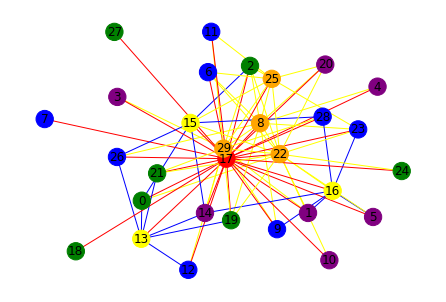

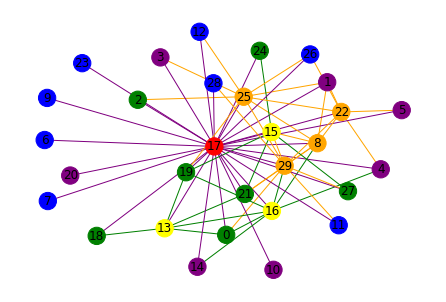

In [6]:
nets = create_networks(['business', 'social'])

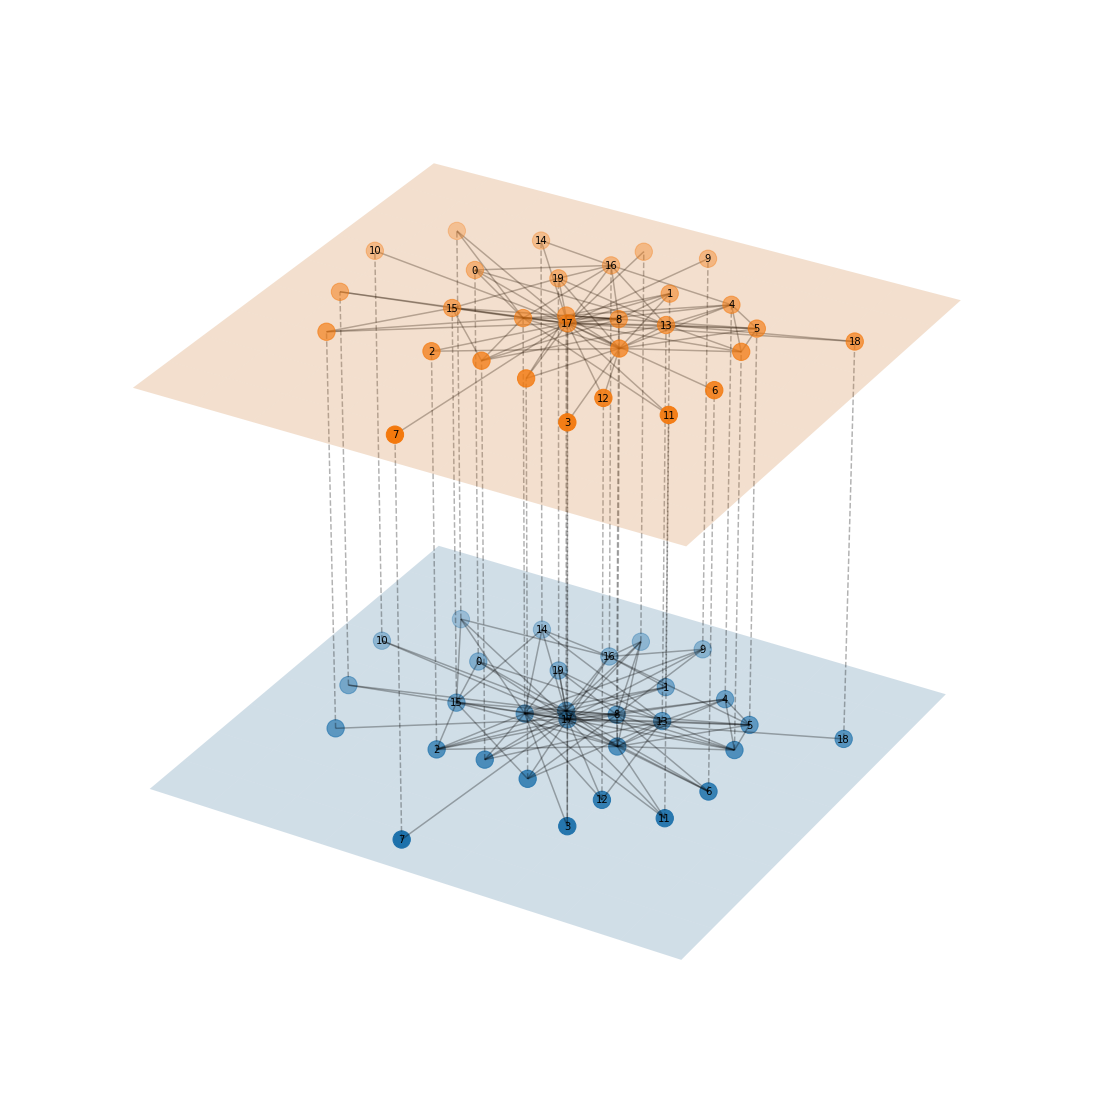

In [12]:
# initialise figure and plot
fig = plt.figure(figsize=(36, 20))
ax = fig.add_subplot(111, projection='3d')
LayeredNetworkGraph([nets[0], nets[1]], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
ax.set_axis_off()
plt.show()

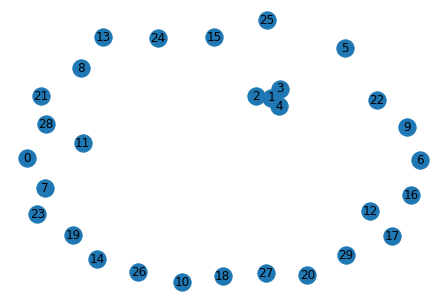

In [68]:
testg = nx.empty_graph(30)
testg.add_edge(1, 2)
testg.add_edge(1, 3)
testg.add_edge(1, 4)

nx.draw(testg, with_labels=True)

In [13]:
random.choice((0, 10), 5)

TypeError: choice() takes 2 positional arguments but 3 were given

In [110]:
N = 5
g1 = nx.generators.erdos_renyi_graph(N,0.5,seed=218)
g2 = nx.generators.erdos_renyi_graph(N,0.6,seed=211)
g3 = nx.generators.erdos_renyi_graph(N,0.7,seed=208)
adj_block = sps.lil_matrix(np.zeros((N*3,N*3)))
adj_block[0:  N,  N:2*N] = np.identity(N)    # L_12
adj_block[0:  N,2*N:3*N] = np.identity(N)    # L_13
adj_block[N:2*N,2*N:3*N] = np.identity(N)    # L_23
adj_block += adj_block.T

In [111]:
mg = nx.MultiGraph(list_of_layers=[g1,g2,g3],
                        inter_adjacency_matrix=adj_block)

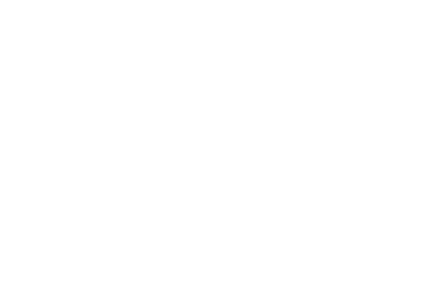

In [112]:
nx.draw(mg, with_labels=True)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19'}


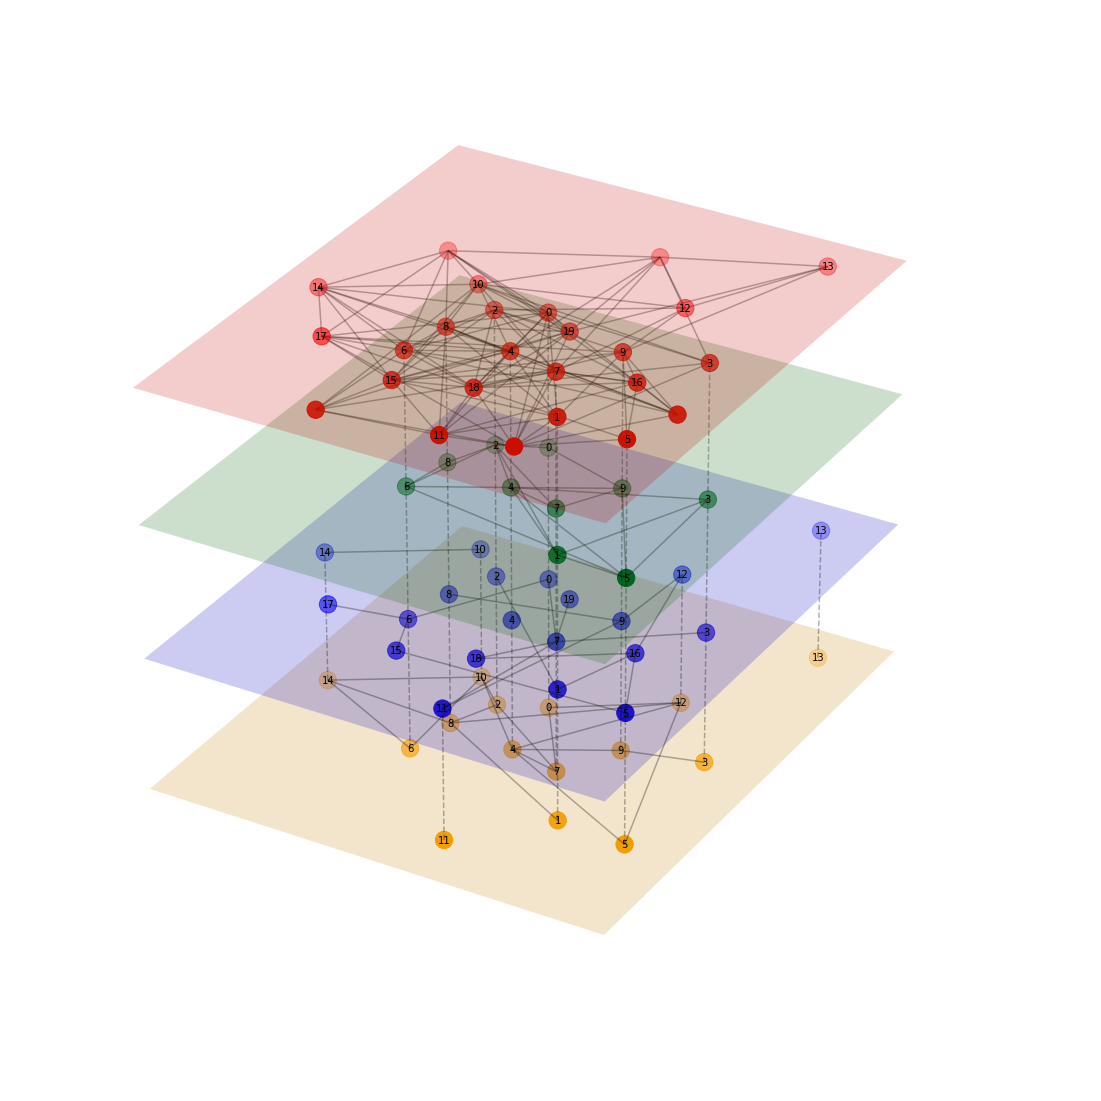

In [27]:
# define graphs
n = 5
g = nx.erdos_renyi_graph(4*n, p=0.1)
h = nx.erdos_renyi_graph(3*n, p=0.2)
i = nx.erdos_renyi_graph(2*n, p=0.4)
j = nx.erdos_renyi_graph(5*n, p=0.4)

node_labels = {nn : str(nn) for nn in range(4*n)}
print(node_labels)

# initialise figure and plot
fig = plt.figure(figsize=(36, 20))
ax = fig.add_subplot(111, projection='3d')
LayeredNetworkGraph([h, g, i, j], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
ax.set_axis_off()
plt.show()

In [26]:
"""
Plot multi-graphs in 3D.
"""
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


class LayeredNetworkGraph(object):

    def __init__(self, graphs, node_labels=None, layout=nx.spring_layout, ax=None):
        """Given an ordered list of graphs [g1, g2, ..., gn] that represent
        different layers in a multi-layer network, plot the network in
        3D with the different layers separated along the z-axis.

        Within a layer, the corresponding graph defines the connectivity.
        Between layers, nodes in subsequent layers are connected if
        they have the same node ID.

        Arguments:
        ----------
        graphs : list of networkx.Graph objects
            List of graphs, one for each layer.

        node_labels : dict node ID : str label or None (default None)
            Dictionary mapping nodes to labels.
            If None is provided, nodes are not labelled.

        layout_func : function handle (default networkx.spring_layout)
            Function used to compute the layout.

        ax : mpl_toolkits.mplot3d.Axes3d instance or None (default None)
            The axis to plot to. If None is given, a new figure and a new axis are created.

        """

        # book-keeping
        self.graphs = graphs
        self.total_layers = len(graphs)

        self.node_labels = node_labels
        self.layout = layout
        
        
        self.color_list = ['orange', 'blue', 'green', 'red', 'k']

        if ax:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()


    def get_nodes(self):
        """Construct an internal representation of nodes with the format (node ID, layer)."""
        self.nodes = []
        for z, g in enumerate(self.graphs):
            self.nodes.extend([(node, z) for node in g.nodes()])


    def get_edges_within_layers(self):
        """Remap edges in the individual layers to the internal representations of the node IDs."""
        self.edges_within_layers = []
        for z, g in enumerate(self.graphs):
            self.edges_within_layers.extend([((source, z), (target, z)) for source, target in g.edges()])


    def get_edges_between_layers(self):
        """Determine edges between layers. Nodes in subsequent layers are
        thought to be connected if they have the same ID."""
        self.edges_between_layers = []
        for z1, g in enumerate(self.graphs[:-1]):
            z2 = z1 + 1
            h = self.graphs[z2]
            shared_nodes = set(g.nodes()) & set(h.nodes())
            self.edges_between_layers.extend([((node, z1), (node, z2)) for node in shared_nodes])


    def get_node_positions(self, *args, **kwargs):
        """Get the node positions in the layered layout."""
        # What we would like to do, is apply the layout function to a combined, layered network.
        # However, networkx layout functions are not implemented for the multi-dimensional case.
        # Futhermore, even if there was such a layout function, there probably would be no straightforward way to
        # specify the planarity requirement for nodes within a layer.
        # Therefor, we compute the layout for the full network in 2D, and then apply the
        # positions to the nodes in all planes.
        # For a force-directed layout, this will approximately do the right thing.
        # TODO: implement FR in 3D with layer constraints.

        composition = self.graphs[0]
        for h in self.graphs[1:]:
            composition = nx.compose(composition, h)

        pos = self.layout(composition, *args, **kwargs)

        self.node_positions = dict()
        for z, g in enumerate(self.graphs):
            self.node_positions.update({(node, z) : (*pos[node], z) for node in g.nodes()})


    def draw_nodes(self, nodes, color, *args, **kwargs):
        x, y, z = zip(*[self.node_positions[node] for node in nodes])
        self.ax.scatter(x, y, z, color=color, *args, **kwargs)


    def draw_edges(self, edges, *args, **kwargs):
        segments = [(self.node_positions[source], self.node_positions[target]) for source, target in edges]
        line_collection = Line3DCollection(segments, *args, **kwargs)
        self.ax.add_collection3d(line_collection)


    def get_extent(self, pad=0.1):
        xyz = np.array(list(self.node_positions.values()))
        xmin, ymin, _ = np.min(xyz, axis=0)
        xmax, ymax, _ = np.max(xyz, axis=0)
        dx = xmax - xmin
        dy = ymax - ymin
        return (xmin - pad * dx, xmax + pad * dx), \
            (ymin - pad * dy, ymax + pad * dy)


    def draw_plane(self, z, color, *args, **kwargs):
        (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
        u = np.linspace(xmin, xmax, 10)
        v = np.linspace(ymin, ymax, 10)
        U, V = np.meshgrid(u ,v)
        W = z * np.ones_like(U)
        self.ax.plot_surface(U, V, W, color=color, *args, **kwargs)


    def draw_node_labels(self, node_labels, *args, **kwargs):
        for node, z in self.nodes:
            if node in node_labels:
                ax.text(*self.node_positions[(node, z)], node_labels[node], *args, **kwargs)


    def draw(self):

        self.draw_edges(self.edges_within_layers,  color='k', alpha=0.3, linestyle='-', zorder=2)
        self.draw_edges(self.edges_between_layers, color='k', alpha=0.3, linestyle='--', zorder=2)

        for z in range(self.total_layers):
            color = self.color_list[z]
            self.draw_plane(z, color, alpha=0.2, zorder=1)
            self.draw_nodes([node for node in self.nodes if node[1]==z], color, s=300, zorder=3)

        if self.node_labels:
            self.draw_node_labels(self.node_labels,
                                  horizontalalignment='center',
                                  verticalalignment='center',
                                  zorder=100)

In [ ]:
# Create list of nodes
N = 30
shuffled = random.sample(range(0, N), N)

# Set roles
kingpin_main = shuffled[0]
kingpin_list = shuffled[1:4]
orphan_list = shuffled[4:8]
broker_list = shuffled[8:16]
dealer_list = shuffled[16:23]
coordinator_list = shuffled[23:30]

# Create network
G = nx.erdos_renyi_graph(n=N, p=0.2)

# Print role numbers
print('Kingpin main: ', kingpin_main)
print('Kingpin list: ', kingpin_list)
print('Oprhan: ', orphan_list)
print('broker: ', broker_list)
print('dealer: ', dealer_list)
print('coordinator: ', coordinator_list)

# Set normal edges to grey color
colors = 'grey'
nx.set_edge_attributes(G, colors, "color")

# Add potential kingping edges and set blue
for k in kingpin_list:
    edge_list = [(k, x) for x in G.nodes() if ((k is not x) and (random.uniform(0, 1) < 0.25))]
    G.add_edges_from(edge_list, color='blue', weight=70)

# Add kingpin edges and set red
edge_list = [(kingpin_main, x) for x in G.nodes() if kingpin_main is not x]
G.add_edges_from(edge_list, color='red', weight = 100)
   
# Set node colours
color_dict = {kingpin_main: 'red'} | dict.fromkeys(kingpin_list, 'yellow') | \
dict.fromkeys(orphan_list, 'orange') | dict.fromkeys(broker_list, 'blue') | \
dict.fromkeys(dealer_list, 'green') | dict.fromkeys(coordinator_list, 'purple')
values = [color_dict.get(node, 0.25) for node in G.nodes()]

# Set edge colours
edge_colors = nx.get_edge_attributes(G,'color').values()

# Draw network
nx.draw(G, with_labels=True, node_color=values, edge_color=edge_colors)

In [2]:
class Agents(Agent):
    def __init__ (self, unique_ID, model, role, weight, name, gender):
        super(). __init__(unique_ID, model)
    
        self.role = role 
        self.weight = weight
        if random.uniform(0,1) < gender:
            self.gen = "m"
        else:
            self.gen = "f"
    
    def step(self):
        print(self.role)
        print(self.gen)
        print("test")
        
    def stage1(self):
        print('stage1')
        
    def stage2(self):
        print('stage2')

In [3]:
class Connections(Agent):
    def __init__ (self, connection_ID, model, business, family, social, criminal, agent1, agent2 ):
        super().__init__(connection_ID, model)
    
        self.business = business
        self.family = family
        self.social = social
        self.criminal = criminal
        self.agent1 = agent1
        self.agent2 = agent2
        
    def step(self):
        print(self.social)
        
    def stage1(self):
        print('stage1')
        
    def stage2(self):
        print('stage2')

In [ ]:
class ReplacementModel(Model):
    
    def __init__ (self, phase, kingpin, agent_list, connection_list, gender_choosing, network):
        self.schedule = StagedActivation(self, stage_list = ['stage1', 'stage2'])
        
        
        for node in network:
            
            a = Agents('A'+str(i), self, df.iloc[i]['Role'], df.iloc[i]['Weight'], df.iloc[i]['Name'], gender_choosing)
            self.schedule.add(a)
    
#         for i in range(len(agent_list)):
#             a = Agents('A'+str(i), self, df.iloc[i]['Role'], df.iloc[i]['Weight'], df.iloc[i]['Name'], gender_choosing)
#             self.schedule.add(a)
        
#         for i in range(len(connection_list)):
#             c = Connections('C'+str(i), self, cdf.iloc[i]['Business'], cdf.iloc[i]['Family'], cdf.iloc[i]['Social'], 
#                             cdf.iloc[i]['Criminal'], cdf.iloc[i]['Agent1'], cdf.iloc[i]['Agent2'])
#             self.schedule.add(c)    
    
    
    def step(self):
        self.schedule.step()